In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.mixture
import scipy.stats as ss
import seaborn as sns

np.random.seed(12345678)

df = pd.read_csv('../output.csv')


create weighted. Throw out bins with unmasked<=.5*nvox

In [11]:
nvox = 64*64*48
df['weighted'] = df['synapses']/df['unmasked']*nvox

dfthr = df[df['unmasked']>nvox*0.5] # Thresholded data frame

### 1) 2D exploratory graphs with weighted data

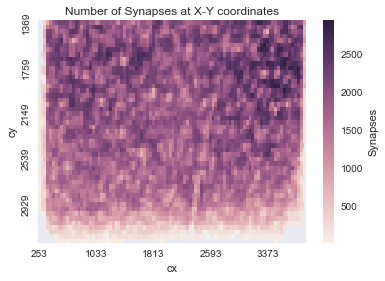

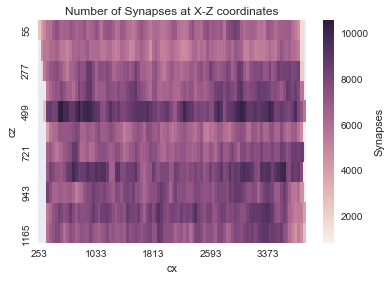

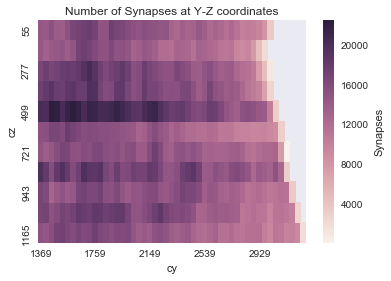

In [12]:
sumXY = pd.pivot_table(dfthr, index='cy', columns='cx', values='synapses', aggfunc=np.sum)
sumXZ = pd.pivot_table(dfthr, index='cz', columns='cx', values='synapses', aggfunc=np.sum)
sumYZ = pd.pivot_table(dfthr, index='cz', columns='cy', values='synapses', aggfunc=np.sum)

plt.figure()
sns.heatmap(sumXY, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Synapses'});
plt.title('Weighted Number of Synapses at X-Y coordinates');

plt.figure()
sns.heatmap(sumXZ, xticklabels=20, yticklabels=2, cbar_kws={'label': 'Synapses'});
plt.title('Weighted Number of Synapses at X-Z coordinates');

plt.figure()
sns.heatmap(sumYZ, xticklabels=10, yticklabels=2, cbar_kws={'label': 'Synapses'});
plt.title('Weighted Number of Synapses at Y-Z coordinates');

### 1a) comparison with non-weighted plots

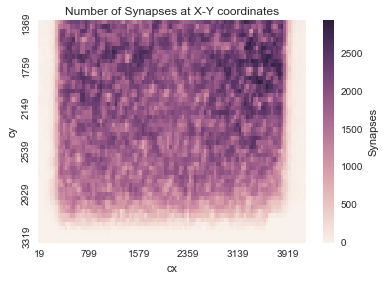

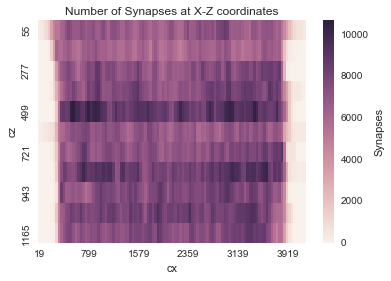

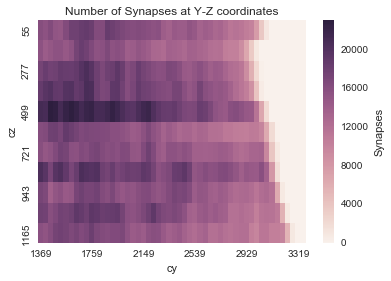

In [13]:
sumXY = pd.pivot_table(df, index='cy', columns='cx', values='synapses', aggfunc=np.sum)
sumXZ = pd.pivot_table(df, index='cz', columns='cx', values='synapses', aggfunc=np.sum)
sumYZ = pd.pivot_table(df, index='cz', columns='cy', values='synapses', aggfunc=np.sum)

plt.figure()
sns.heatmap(sumXY, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Synapses'});
plt.title('Number of Synapses at X-Y coordinates');

plt.figure()
sns.heatmap(sumXZ, xticklabels=20, yticklabels=2, cbar_kws={'label': 'Synapses'});
plt.title('Number of Synapses at X-Z coordinates');

plt.figure()
sns.heatmap(sumYZ, xticklabels=10, yticklabels=2, cbar_kws={'label': 'Synapses'});
plt.title('Number of Synapses at Y-Z coordinates');

### 2) cut off edges

[ 253  292  331  370  409  448  487  526  565  604  643  682  721  760  799
  838  877  916  955  994 1033 1072 1111 1150 1189 1228 1267 1306 1345 1384
 1423 1462 1501 1540 1579 1618 1657 1696 1735 1774 1813 1852 1891 1930 1969
 2008 2047 2086 2125 2164 2203 2242 2281 2320 2359 2398 2437 2476 2515 2554
 2593 2632 2671 2710 2749 2788 2827 2866 2905 2944 2983 3022 3061 3100 3139
 3178 3217 3256 3295 3334 3373 3412 3451 3490 3529 3568 3607 3646 3685 3724
 3763 3802 3841 3880]


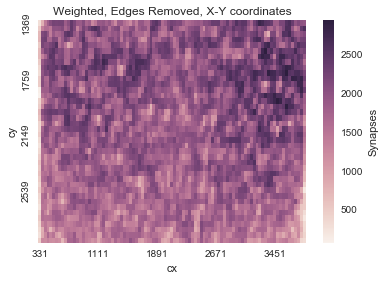

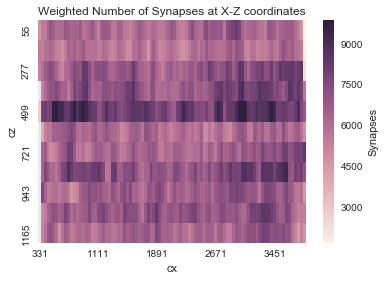

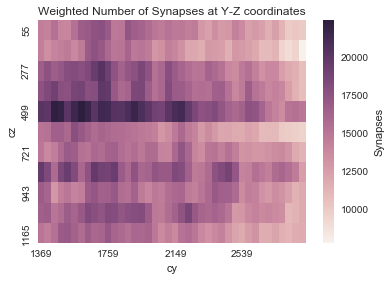

In [20]:
cxu = dfthr['cx'].unique()
print cxu

dfcut = dfthr[(dfthr['cx']>=331) & (dfthr['cx']<=3841) & (dfthr['cy']<=2905)] 
sumXY = pd.pivot_table(dfcut, index='cy', columns='cx', values='synapses', aggfunc=np.sum)
sumXZ = pd.pivot_table(dfcut, index='cz', columns='cx', values='synapses', aggfunc=np.sum)
sumYZ = pd.pivot_table(dfcut, index='cz', columns='cy', values='synapses', aggfunc=np.sum)

plt.figure()
sns.heatmap(sumXY, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Synapses'});
plt.title('Weighted, Edges Removed, X-Y coordinates');

plt.figure()
sns.heatmap(sumXZ, xticklabels=20, yticklabels=2, cbar_kws={'label': 'Synapses'});
plt.title('Weighted Number of Synapses at X-Z coordinates');

plt.figure()
sns.heatmap(sumYZ, xticklabels=10, yticklabels=2, cbar_kws={'label': 'Synapses'});
plt.title('Weighted Number of Synapses at Y-Z coordinates');


### 3) 3D plot: Scatterplots of weighted/edges-removed data

664.574914495 16.4993426267


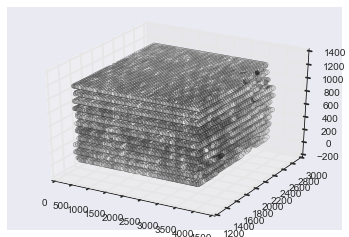

In [75]:
print dfcut['weighted'].max(), dfcut['weighted'].min()

colorBinned = np.round(20*(dfcut['weighted'] - dfcut['weighted'].min())/(dfcut['weighted'].max() - dfcut['weighted'].min()))
# print np.unique(colorBinned)
# print np.arange(20)
colors = cm.gray(np.linspace(0, 1, len(colorBinned)))
# print colors[np.arange(21)]
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(np.arange(21),np.arange(21),zs = np.arange(21),c = colors[np.arange(21)])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfcut['cx'],dfcut['cy'],zs=dfcut['cz'],c=colorBinned)

### 3a) 3D plot at various thresholds

[ 0.]
[ 1.  2.  3.  4.  5.]
[  6.   7.   8.   9.  10.]
[ 11.  12.  13.  14.  15.]
[ 16.  17.  18.  19.  20.]


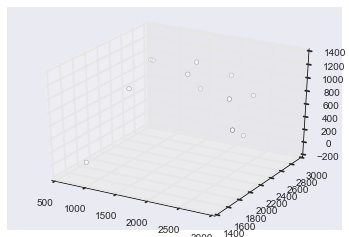

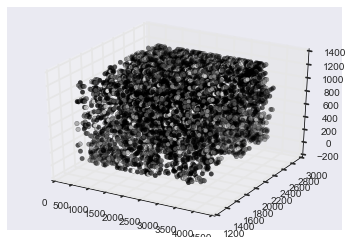

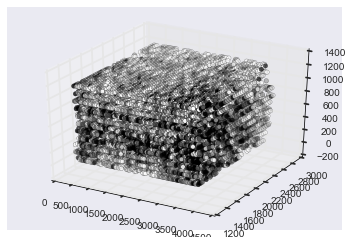

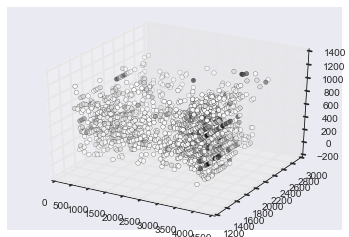

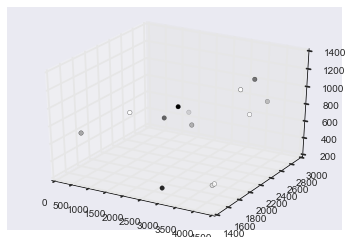

In [83]:
colorBinned = np.round(20*(dfcut['weighted'] - dfcut['weighted'].min())/(dfcut['weighted'].max() - dfcut['weighted'].min()))
# print np.unique(colorBinned)
# unqColor = np.unique(colorBinned)
for cc in [0,5,10,15,20]:
    curDf = dfcut[(colorBinned<=cc) & (colorBinned>cc-5)]
    curColor = colorBinned[(colorBinned<=cc) & (colorBinned>cc-5)]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(curDf['cx'],curDf['cy'],zs=curDf['cz'],c=curColor)
    print np.unique(curColor)

### 4) uniform distribution testing

In [88]:
print 'mean weighted: ', dfcut['weighted'].mean()

(chi2,p) = ss.chisquare(dfcut['weighted'],f_exp=dfcut['weighted'].mean(),ddof=1)
print "chi-squared statistic: ",chi2
print "p-value: ", p

mean weighted:  250.359322754
chi-squared statistic:  661299.233928
p-value:  0.0


### 5) Hypothesis test: 

In [112]:
miny = dfcut['cy'].min()
maxy = dfcut['cy'].max()
th0 = miny
th1 = (maxy - miny)/4 + miny
th2 = (maxy - miny)/2 + miny
th3 = (maxy - miny)*3/4 + miny
th4 = maxy

df1 = dfcut[(dfcut['cy']>=th0) & (dfcut['cy']<th1)]
df2 = dfcut[(dfcut['cy']>=th1) & (dfcut['cy']<th2)]
df3 = dfcut[(dfcut['cy']>=th2) & (dfcut['cy']<th3)]
df4 = dfcut[(dfcut['cy']>=th3) & (dfcut['cy']<=th4)]

# whoops ran out of time